In [11]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

from rapidgbm import RapidGBMTuner


In [7]:
X, y = load_breast_cancer(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [8]:
tuner = RapidGBMTuner(metric = 'auc', trials = 4, verbosity = 5, visualization=False)
tuner.fit(X_train, y_train)


[I 2024-03-23 17:57:12,267] A new study created in memory with name: no-name-dae36ce6-b614-4f2b-8f3d-bbfaa920ff03



 * Initiating LGBMTuner.fit
     . Settings:
     .. Trying 4 trials
     .. Evaluation metric: auc 
     .. Study direction: minimize log_loss



[I 2024-03-23 17:57:13,294] Trial 0 finished with value: 0.1121349721443632 and parameters: {'feature_fraction': 0.6872700594236812, 'num_leaves': 244}. Best is trial 0 with value: 0.1121349721443632.


     . Trial number: 0 finished
     .. Optimization score (lower-better): log_loss: 0.1121349721443632
     .. Evaluation score (greater-better): auc: 0.9921641791044775
 ...........................................................................


[I 2024-03-23 17:57:14,368] Trial 1 finished with value: 0.0659482285331329 and parameters: {'feature_fraction': 0.8659969709057025, 'num_leaves': 159}. Best is trial 1 with value: 0.0659482285331329.


     . Trial number: 1 finished
     .. Optimization score (lower-better): log_loss: 0.0659482285331329
     .. Evaluation score (greater-better): auc: 0.9962686567164178
 ...........................................................................


[I 2024-03-23 17:57:14,812] Trial 2 finished with value: 0.084951688084747 and parameters: {'feature_fraction': 0.5780093202212182, 'num_leaves': 53}. Best is trial 1 with value: 0.0659482285331329.


     . Trial number: 2 finished
     .. Optimization score (lower-better): log_loss: 0.084951688084747
     .. Evaluation score (greater-better): auc: 0.9944029850746269
 ...........................................................................


[I 2024-03-23 17:57:15,444] Trial 3 finished with value: 0.08710431885245323 and parameters: {'feature_fraction': 0.5290418060840998, 'num_leaves': 223}. Best is trial 1 with value: 0.0659482285331329.


     . Trial number: 3 finished
     .. Optimization score (lower-better): log_loss: 0.08710431885245323
     .. Evaluation score (greater-better): auc: 0.9955223880597015
 ...........................................................................

   - Fitting optimized model with the following params:
task                             : train
learning_rate                    : 0.01
num_leaves                       : 159
feature_fraction                 : 0.8659969709057025
bagging_fraction                 : 0.7
bagging_freq                     : 1
max_depth                        : -1
verbosity                        : -1
lambda_l1                        : 1
lambda_l2                        : 0.0
min_split_gain                   : 0.0
zero_as_missing                  : False
max_bin                          : 255
min_data_in_bin                  : 3
random_state                     : 42
device_type                      : cpu
num_classes                      : 1
objective             

In [12]:
roc_auc_score(y_test, tuner.predict_proba(X_test))

0.9987421383647799

Intermediate Values Plot is saved to /Users/danielhansmunk/Documents/PythonWork/RapidGBM/rapidgbm/rapidgbm/examples/intermediate_values.png


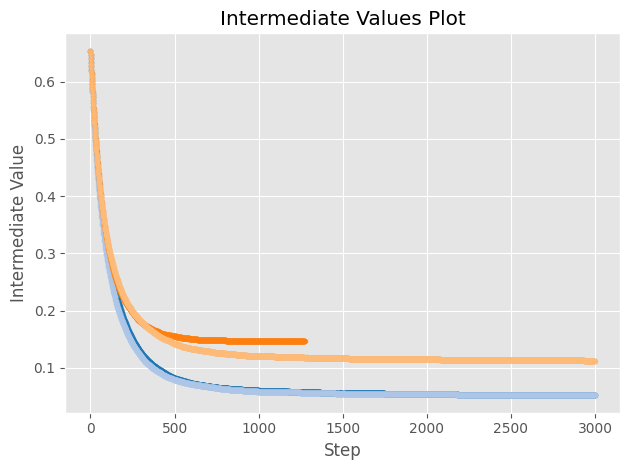

In [7]:
tuner.plot_intermediate_values(tuner.study, save=True, display=False)